In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from util import k_means_plot

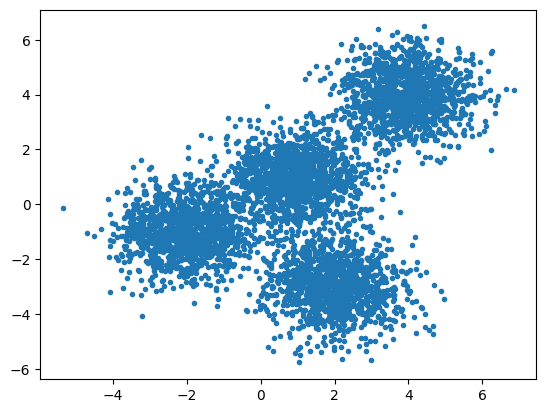

In [2]:
# Generate random data
np.random.seed(0)
Feature_Matrix, Response_Vector = make_blobs(n_samples=5000, 
    centers=[[4,4],[-2, -1], [2, -3], [1, 1]], 
    cluster_std=0.9)
plt.scatter(Feature_Matrix[:, 0], Feature_Matrix[:, 1], marker='.')
plt.show()

### Setting up K-Means

In [3]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# n_clusters: The number of clusters to form as well as the number of centroids to generate.
k_means.fit(Feature_Matrix)

KMeans(n_clusters=4, n_init=12)

In [4]:
labels = k_means.labels_
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [5]:
cluster_centers = k_means.cluster_centers_
print(cluster_centers)
len(cluster_centers)

[[-2.03743147 -0.99782524]
 [ 3.97334234  3.98758687]
 [ 0.96900523  0.98370298]
 [ 1.99741008 -3.01666822]]


4

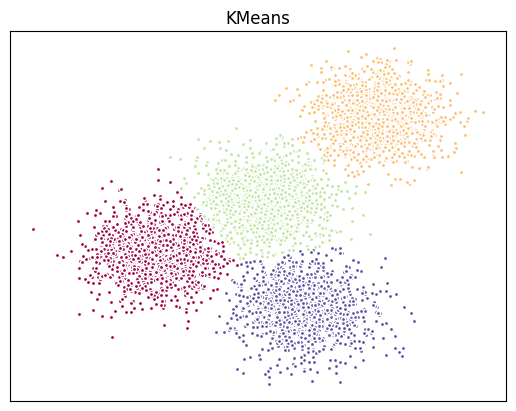

In [6]:
k_means_plot(labels, cluster_centers, Feature_Matrix)